In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
from matplotlib import rcParams

import warnings
warnings.filterwarnings("ignore")

# DATA EXPLORATION

In [2]:
#putting data into a pandas dataframe
sd_df=pd.read_csv('Speed Dating Data.csv', sep=',', encoding="iso-8859-1")
sd_df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [3]:
#get the number of rows and columns
print("the speed dating dataframe contain {} rows and {} columns".format(sd_df.shape[0],sd_df.shape[1]))

the speed dating dataframe contain 8378 rows and 195 columns


In [4]:
pd.set_option('display.max_columns', 200) #to display all the columns 
pd.set_option('display.max_rows', 8400) #to display all the rows 

In [5]:
#get a full description of the dataframe
sd_df.describe(include="all")

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,8378.000000,8368.000000,8378.000000,8220.000000,8378.000000,8274.000000,8305.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8378.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8128.000000,8060.000000,7993.000000,8283.000000,8315,8296.000000,4914,3133,3583,8315.000000,8299.000000,8299.000000,8299,7314,4279,8299.000000,8281.000000,8299.000000,8289,8240.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8277.000000,1800.000000,8299.000000,8299.000000,8299.000000,8289.000000,8279.000000,8257.000000,6489.000000,6489.000000,6489.000000,6489.000000,6489.000000,6467.000000,8299.000000,8299.000000,8299.000000,8299.000000,8289.000000,8289.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,4906.000000,4906.000000,4906.000000,4906.000000,4906.000000,8378.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000,8138.000000,8069.000000,8003.000000,7205.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,7463.000000,7463.000000,7433.000000,1984.000000,1955.000000,1984.000000,1984.000000,1955.000000,1974.000000,7445.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.00000,5775.000000,5775.000000,5775.000000,5775.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,4377.000000,4377.000000,4377.000000,4377.000000,4377.000000,3974.000000,3974.000000,3974.000000,1496.000000,668.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2016.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259,NaN,241,68,115,NaN,NaN,NaN,269,409,261,NaN,NaN,NaN,367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
print("Percentage of missing values: ")
missing_values_p=(100*sd_df.isnull().sum()/sd_df.shape[0]).sort_values(ascending=False)
missing_values_p=missing_values_p.to_frame(name='percentage_of_NA')
missing_values_p.head(50)

Percentage of missing values: 


,percentage_of_NA
num_in_3,92.026737
numdat_3,82.143710
expnum,78.515159
sinc7_2,76.665075
amb7_2,76.665075
shar7_2,76.438291
attr7_2,76.318931
intel7_2,76.318931
fun7_2,76.318931
amb5_3,75.936978


## let's compare missing values in different followup questions

In [7]:
print('Percentage of missing values > 50% per column')
missing_values_p_50=missing_values_p[missing_values_p.percentage_of_NA>50]
print('number of columns with missing values percentage > 50 % : {}'.format(len(missing_values_p_50)))

Percentage of missing values > 50% per column
number of columns with missing values percentage > 50 % : 59


In [8]:
missing_values_p.percentage_of_NA['them_cal']

52.56624492719026

In [9]:
#count the number of Time 3 questions
q3=sum('_3' in x for x in sd_df.columns) + 2 #+2 for thee columns you call and them call
print('the number of Time 3 questions is: {}'.format(q3))

#count the number of Time 3 questions with a percentage of missing values > 50%
q3_50=sum('_3' in x for x in missing_values_p_50.index.tolist()) + sum('you_call' in x for x in missing_values_p_50.index.tolist()) +sum('them_cal' in x for x in missing_values_p_50.index.tolist())
print('the number of Time 3 questions with a percentage of missing values > 50% is: {}'.format(q3_50))

#all the Time 3 questions have between 50% and 92% of missing values
#too many missing values in the Time 3 questions -> maybe due to the complexity or ability to remember all the details at this state of the experiment so we will not take them into account in our analysis
sd_df=sd_df.loc[:,:'amb5_2']

the number of Time 3 questions is: 39
the number of Time 3 questions with a percentage of missing values > 50% is: 39


In [10]:
#count the number of Time 2 questions
q2=sum('_2' in x for x in sd_df.columns) + 1 #+1 for lengh column 
print('the number of Time 2 questions is: {}'.format(q2))

#count the number of Time 2 questions with a percentage of missing values > 50%
q2_50=sum( '_2' in x for x in missing_values_p_50.index.tolist()) + sum( 'length' in x for x in missing_values_p_50.index.tolist())
print('the number of Time 2 questions with a percentage of missing values > 50% is: {}'.format(q2_50))

#only 6 Time 2 questions have between 50% and 76% of missing value 

the number of Time 2 questions is: 37
the number of Time 2 questions with a percentage of missing values > 50% is: 6


In [11]:
#for the Time 1 set of questions we start from column 'age' to column 'amb3_s'
q1= sd_df.columns.get_loc('amb3_s')- sd_df.columns.get_loc('age') + 1
print('the number of Time 1 questions is: {}'.format(q1))
q1_columns=sd_df.iloc[:,sd_df.columns.get_loc('age'):(sd_df.columns.get_loc('amb3_s')+1)].columns.tolist()
print('the number of Time 1 questions with a percentage of missing values > 50% is: {}'.format(len(list(set(q1_columns).intersection(missing_values_p_50.index.tolist())))))

the number of Time 1 questions is: 86
the number of Time 1 questions with a percentage of missing values > 50% is: 14


In [12]:
#count the number of Time 1 questions
q1=sum('_1' in x for x in sd_df.columns)
print('the number of Time 1 questions is: {}'.format(q1))

#count the number of Time 1 questions with a percentage of missing values > 50%
q1_50=sum('_1' in x for x in missing_values_p_50.index.tolist())
print('the number of Time 1 questions with a percentage of missing values > 50% is: {}'.format(q1_50))


#we will not count questions "_s"  because of the nature of the question which can induce to let missing values in columns

the number of Time 1 questions is: 28
the number of Time 1 questions with a percentage of missing values > 50% is: 0


In [13]:
print('Number of unique participants = {}'.format(sd_df.iid.nunique()))

Number of unique participants = 551


In [14]:
print('count the number of match')
sd_df.drop_duplicates(subset='iid', keep='first', ignore_index=True).match.value_counts()

count the number of match


0    468
1     83
Name: match, dtype: int64

# WHAT MAKE PEOPLE MATCH ?


## LET'S TAKE A LOOK TO THE IMPACT OF THE AGE, GENDER, RACE, FIELD OF OCCUPATION AND ATTRIBUTE ON THE MATCH

## DATA PREPROCESSING

In [15]:
#replace gender values by male and female
sd_df.gender.replace(0, "female", inplace=True)
sd_df.gender.replace(1, "male", inplace=True)


In [16]:
#replace the missing values in age column with the 
sd_df.age.fillna(sd_df.age.mean()//1, inplace=True)
sd_df.age_o.fillna(sd_df.age_o.mean()//1, inplace=True)


In [17]:
#replace field_cd values with corresponding data and fill missing values with "unknown"
field_list=['Law','Math','Social Science, Psychologist','Medical Science, Pharmaceuticals, and Bio Tech','Engineering','English/Creative Writing/ Journalism',
'History/Religion/Philosophy','Business/Econ/Finance','Education, Academia','Biological Sciences/Chemistry/Physics','Social Work','Undergrad/undecided',
'Political Science/International Affairs','Film','Fine Arts/Arts Administration','Languages','Architecture','other']
for i in range(len(field_list)):
    sd_df.field_cd.replace(i+1, field_list[i], inplace=True)
sd_df.field_cd.fillna("unknown", inplace=True)

In [18]:
# replace race values with corresponding data and fill missing values with "unknown"
race_list = ['Black', 'European', 'Latino', 'Asian', 'Native', 'Other']
for i in range(len(race_list)):
    sd_df.race.replace(i+1,race_list[i],inplace=True)
sd_df.field_cd.fillna("unknown", inplace=True)

In [19]:
#create a dataset without duplicated participants
sd_df_without_duplicate=sd_df.drop_duplicates(subset='iid', keep='first', ignore_index=True)

In [20]:
#create a dataset with only match data for further visualizations
sd_df_without_duplicate_match=sd_df_without_duplicate[sd_df_without_duplicate.match==1]
sd_df_without_duplicate_match.reset_index( drop=True, inplace=True)


## DATA VISUALIZATION

In [21]:
# set plot parameters
rcParams['figure.figsize'] = 14,6
sns.set_theme(style="whitegrid")

sns.set_theme(style="whitegrid")

### IMPACT OF THE AGE AND RACE ON THE MATCH

mean age of male is: 26.581227436823106
mean age of female is: 26.124087591240876


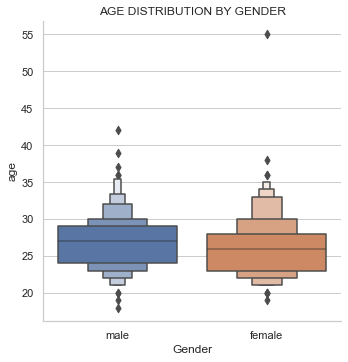

In [22]:
#Age distribution
Graph = sns.catplot(x="gender", y="age", order=['male', 'female'], data=sd_df_without_duplicate, kind="boxen")
Graph.set_axis_labels("Gender", "age").set(title="AGE DISTRIBUTION BY GENDER")

#Mean male and wemen age is approximatively equal
print('mean age of male is: {}'.format(sd_df_without_duplicate.age[sd_df_without_duplicate.gender=='male'].mean()))
print('mean age of female is: {}'.format(sd_df_without_duplicate.age[sd_df_without_duplicate.gender=='female'].mean()))

In [24]:
#calculate the age difference between participants
sd_df_without_duplicate_match['diff_age']=[abs(sd_df_without_duplicate_match['age'][x]-sd_df_without_duplicate_match['age_o'][x]) for x in range(len(sd_df_without_duplicate_match))]

<AxesSubplot:xlabel='race', ylabel='diff_age'>

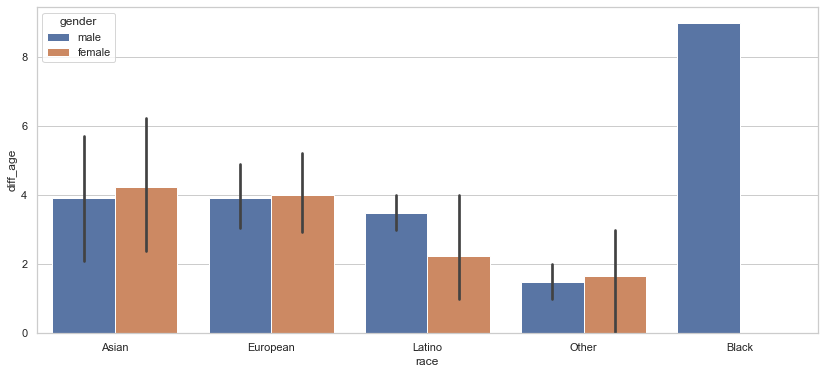

In [25]:
#let's see the difference of age between partners who match
sns.barplot(data=sd_df_without_duplicate_match, y= 'diff_age', x="race", hue='gender') 


#we can see that european and asian people mean difference of age with their match is approximatively 4 years while for black men is approximatively 9 years

let's have a closer look to the race distribution in our experience

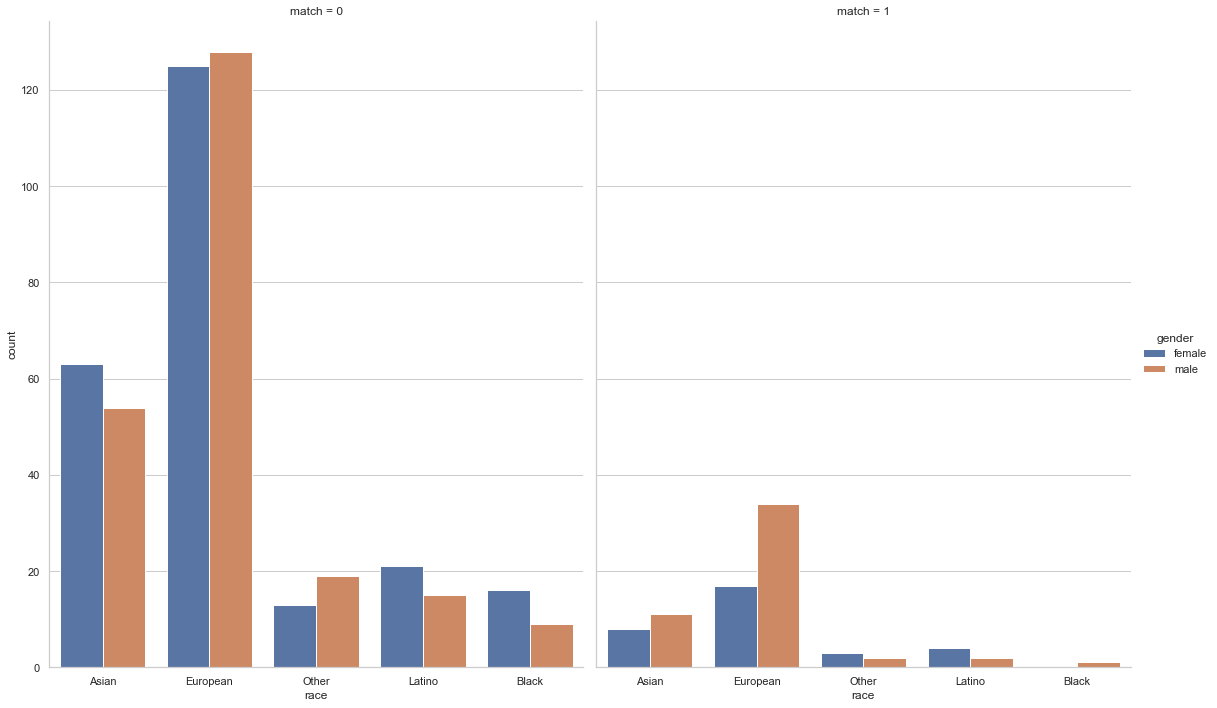

In [26]:
#distribution 
fig1 = sns.catplot(x="race", hue="gender", col="match",
                data=sd_df_without_duplicate, kind="count", legend=True,
                height=10, aspect=0.8);
                
#Number of black people in the experiment is not enough to make conclusion about preferred age difference
#we can see that europeen and asian people are mainly represented compared to other races so we can conclude that our previous results are representative only for these 2 races 

## <font color='red'>-> We can conclude that european and asian people prefer partner with an age difference of approximatively 4 years</font>

# LET SEE WHAT ARE THE ATTRACTIVE FIELD :

In [27]:
#create a dataset with only the participant that have been matched by their partners
sd_df_dec_o=sd_df[sd_df.dec_o==1]
sd_df_dec_o.reset_index( drop=True, inplace=True)
sd_df_dec_o.head(10)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2
0,1,1.0,female,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.00,18.00,19.00,18.00,14.00,12.00,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,Law,NaN,NaN,NaN,Asian,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,female,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.00,5.00,15.00,40.00,5.00,5.00,1,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,2.0,21.0,Law,Law,NaN,NaN,NaN,Asian,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,6.0,8.0,7.0,6.0,8.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,female,1,1,1,10,7,NaN,7,5,15.0,1,0.21,0,24.0,3.0,30.00,10.00,20.00,10.00,10.00,20.00,1,8.0,7.0,9.0,6.0,9.0,7.0,8.0,6.0,2.0,21.0,Law,Law,NaN,NaN,NaN,Asian,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,6.0,7.0,7.0,6.0,6.0,6.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,female,1,1,1,10,7,NaN,6,6,16.0,0,0.25,0,25.0,2.0,50.00,0.00,30.00,10.00,0.00,10.00,1,7.0,7.0,8.0,8.0,7.0,7.0,7.0,6.0,2.0,21.0,Law,Law,NaN,NaN,NaN,Asian,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,0,4.0,9.0,7.0,4.0,6.0,4.0,6.0,5.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,female,1,1,1,10,7,NaN,8,9,19.0,1,0.28,0,28.0,2.0,50.00,0.00,25.00,10.00,0.00,15.00,1,7.0,7.0,8.0,8.0,8.0,9.0,6.5,8.0,2.0,21.0,Law,Law,NaN,NaN,NaN,Asian,2.0,4.0,Chicago,"60,521","

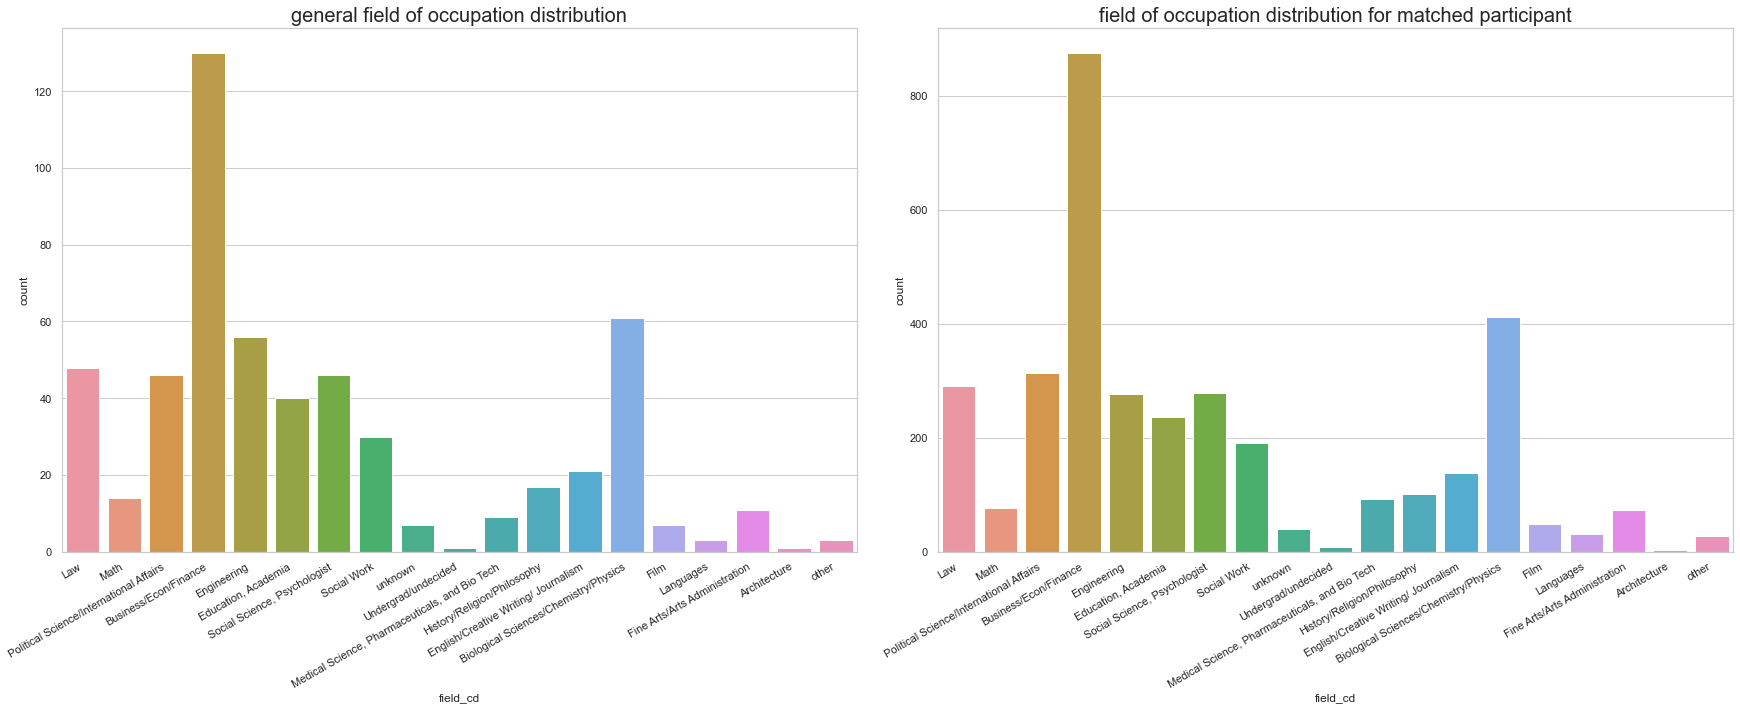

In [53]:
#set display parameter
fig.set_size_inches(25, 10)
fig.tight_layout(pad=4.0)

#plot
fig, ax = plt.subplots(1,2)

ax[0].set_title('general field of occupation distribution', fontsize=20)
sns.countplot(data=sd_df_without_duplicate, x = 'field_cd' ,ax=ax[0])

ax[1].set_title("field of occupation distribution for matched participant", fontsize=20)
sns.countplot(data=sd_df_dec_o, x='field_cd', orient="h", ax=ax[1])


fig.autofmt_xdate()
plt.show()

#we can see that some fields have a big number of partner's match comparing to the number of initial participants

LET'S SEE THE RATIO OF MATCHED PARTICIPANT PER FIELD OF OCCUPATION

In [36]:

#count the number of participant per field
participant=sd_df_without_duplicate.field_cd.value_counts()

#count the number of partner's match per field
matched_participant=sd_df_dec_o.field_cd.value_counts()


#create a new dataset
field_matched_ratio_df=pd.DataFrame(data=participant.values.tolist(),columns=['number_of_initial_participant'], index=participant.index.tolist())

#add a column with the number of matched participant
list_matched_participant=[]
for field in participant.index:
    list_matched_participant.append(matched_participant[field])
field_matched_ratio_df['number_of_matched_participant']=list_matched_participant

#calculate the ratio of partner's match for each
field_matched_ratio_df['ratio_of_matched_participants']=field_matched_ratio_df.number_of_matched_participant/field_matched_ratio_df.number_of_initial_participant

field_matched_ratio_df.head(20)


,number_of_initial_participant,number_of_matched_participant,ratio_of_matched_participants
Business/Econ/Finance,130,875,6.730769
Biological Sciences/Chemistry/Physics,61,412,6.754098
Engineering,56,276,4.928571
Law,48,290,6.041667
Political Science/International Affairs,46,314,6.826087
"Social Science, Psychologist",46,278,6.043478
"Education, Academia",40,237,5.925000
Social Work,30,191,6.366667
English/Creative Writing/ Journalism,21,138,6.571429
History/Religion/Philosophy,17,102,6.000000


In [45]:
#considering that 90% of the participant are represented in the first 10 lines we will focus on this part of the data to get representative conclusions
field_matched_ratio_df=field_matched_ratio_df.iloc[:10,:]
field_matched_ratio_df.sort_values('ratio_of_matched_participants', ascending=False, inplace=True)
field_matched_ratio_df.head(10)

,number_of_initial_participant,number_of_matched_participant,ratio_of_matched_participants
Political Science/International Affairs,46,314,6.826087
Biological Sciences/Chemistry/Physics,61,412,6.754098
Business/Econ/Finance,130,875,6.730769
English/Creative Writing/ Journalism,21,138,6.571429
Social Work,30,191,6.366667
"Social Science, Psychologist",46,278,6.043478
Law,48,290,6.041667
History/Religion/Philosophy,17,102,6.000000
"Education, Academia",40,237,5.925000
Engineering,56,276,4.928571


<font color='red'>-> We can conclude that the top 3 field of occupation for partner's match are: 
<br> 1-Political Science/International Affairs	 
<br> 2-Biological Sciences/Chemistry/Physics 
<br> 3-Business/Econ/Finance	 </font>

# PRIMARY GOALS OF THE MATCHED PARTICIPANTS

In [62]:
# goal of the matched participants
goals = ['Fun night out', 'Meet new people', 'Get a date', 'Serious relationship', 'I did it', 'Other']
for i in range(len(goals)):
    sd_df_dec_o.goal.replace(i+1,goals[i],inplace=True)

In [63]:
#Plotting primary goal of matched partipants
fig = make_subplots(rows=1, cols=1)

tr1=go.Histogram(x=sd_df_dec_o['goal'],name='Goal Histogram')

fig.add_trace(tr1,row=1,col=1)

fig.update_layout(height=500, width=900, title_text="Distribution of matched participant primary goal")
fig.show()



<font color='red'>-> We can conclude that the participants whose primariry goal is "Fun night out" or "Meet new people" are more likely to be matched by other people</font>

# THE IMPORTAANCE OF ATTRIBUTE IN DECISION MAKING

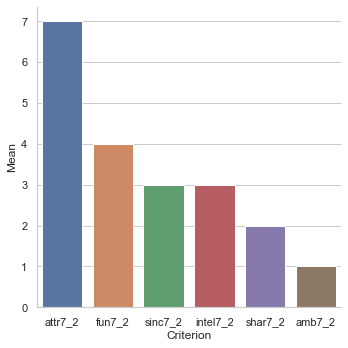

In [50]:

#Critères d'importance en général (hommes et femmes confondus) trié par ordre décroissant
df_criterion = sd_df[["attr7_2","sinc7_2","intel7_2","fun7_2","amb7_2","shar7_2"]].fillna(0).mean().astype(int).sort_values(ascending = False).reset_index().rename(columns={'index':"Criterion", 0:"Mean"})
df_criterion.Criterion=[]

#plot the result
sns.catplot(data = df_criterion, x = 'Criterion', y = "Mean", kind="bar")

#On peut voir que le critère dominant est l'attractivité du partenaire suivi par l'intelligence. Le critère le moins important est l'ambition

<font color='red'>-> We can conclude that the best attribute for decision making is the ATTRACTIVITY </font>

# FINAL CONCLUSION

To have more chances to match with people these are the tips:

- Meeting people with a difference of age of 4 years
- You should choose one of these fields of occupation (Political Science/International Affairs <font color='red'>or</font> Biological Sciences/Chemistry/Physics <font color='red'>or</font> Business/Econ/Finance)
- You should fix a primary goal of just have fun night out or meet new people
- Finally you should take care of your appearance beacause it's the most important attribute for the decision of your partner